**YOUR NAMES HERE**

Spring 2024

CS 443: Bio-inspired Machine Learning

# Lab | Poisson Encoding of MNIST Images

The focus of today's lab is to get some hands-on experience with representing MNIST images as a set of spike trains.

**Please take this lab seriously — much of the code that you write will make its way into your Spiking Neural Network project.**

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.show()
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=3)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task L1: Poisson Encoding of MNIST Images

In the Spiking Neural Networks project, you will build a network of LIF neurons to classify MNIST handwritten digit dataset. This dataset is widely used in the field of bio-inspired machine learning as a benchmark to compare the performance of neural networks.

As usual, we must preprocess our dataset before we can pass it through the neural network. For spiking neural networks, we encode the data in a unique way. We transform each pixel intensity (0-255) of each *static* image sample into a spike train *across time* (i.e. a temporal code). The idea is that stronger pixel intensities (e.g. 255) give rise to more spikes over some fixed period of time (e.g. 350 msec) than weaker pixel intensities (e.g. 30). Thus, the pixel value becomes coded in the spike rate over time. So a pixel value of 100 results in an average of 100 spikes every second (100 hz). So if the original (flattened) shape of the MNIST dataset is `(60000, 784)`, the spike train version has shape `(60000, 350, 784)` if we use 350 msec spike trains.

The **Poisson process** is a convenient way to generate spike trains that have a certain average spike rate per second. We plug in the average spike rate (e.g. 100 spikes per second — 100 hz) and it gives us the spike train with the appropriate number of spikes over 1 second or proportionally many spikes over any period that we would like (e.g. 50 spikes over 500 msec). The Poisson process incorporates randomness just like in real neurons so that the precise timing of spikes might be different if you generate two 100 hz spike trains for the same data sample, but the spike trains have the same *average* number of spikes over the same time period and therefore encode the same information. 

### Task L1a. Copy over `mnist.py` and data from Project 1 to your lab working directory.

Put the MNIST data in a `data` subfolder like before.

Make the following changes to your code:
1. Change your `get_mnist` to return the train/test/val splits in NumPy ndarray format instead of as TF Tensors.
2. Add a new keyword argument to `get_mnist` called `max_value` with default value of `128`. After you normalize your MNIST samples, scale the range so that the pixel values range between `(0, max_value)`. *Be sure to apply this to all your splits.*

In [5]:
import mnist

2024-04-24 20:15:30.061526: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Test `get_mnist`

In [6]:
x_train, y_train, x_test, y_test, x_val, y_val = mnist.get_mnist(N_val=500, max_value=64, path='data/mnist')
print(f'All train samples shape is {x_train.shape} and should be (59500, 784).')
print(f'All train sample max is {x_train.max()} and should be 64.0.')
print(f'All test samples shape is {x_test.shape} and should be (10000, 784).')
print(f'All test sample max is {x_test.max()} and should be 64.0.')
print(f'All val samples shape is {x_val.shape} and should be (500, 784).')
print(f'All val sample max is {x_val.max()} and should be 64.0.\n')
print(f'All train labels shape is {y_train.shape} and should be (59500,).')
print(f'All train label min/max is {y_train.min()}/{y_train.max()} and should be 0/9.')
print(f'All test labels shape is {y_test.shape} and should be (10000,).')
print(f'All test label min/max is {y_test.min()}/{y_train.max()} and should be 0/9.')
print(f'All val labels shape is {y_val.shape} and should be (500,).')
print(f'All val label min/max is {y_val.min()}/{y_train.max()} and should be 0/9.')

All train samples shape is (59500, 784) and should be (59500, 784).
All train sample max is 64.0 and should be 64.0.
All test samples shape is (10000, 784) and should be (10000, 784).
All test sample max is 64.0 and should be 64.0.
All val samples shape is (500, 784) and should be (500, 784).
All val sample max is 64.0 and should be 64.0.

All train labels shape is (59500,) and should be (59500,).
All train label min/max is 0/9 and should be 0/9.
All test labels shape is (10000,) and should be (10000,).
All test label min/max is 0/9 and should be 0/9.
All val labels shape is (500,) and should be (500,).
All val label min/max is 0/9 and should be 0/9.


In [7]:
x_train, y_train, x_test, y_test, x_val, y_val = mnist.get_mnist(N_val=1000, max_value=128, path='data/mnist')
print(f'All train samples shape is {x_train.shape} and should be (59000, 784).')
print(f'All train sample max is {x_train.max()} and should be 128.0.')
print(f'All test samples shape is {x_test.shape} and should be (10000, 784).')
print(f'All test sample max is {x_test.max()} and should be 128.0.')
print(f'All val samples shape is {x_val.shape} and should be (1000, 784).')
print(f'All val sample max is {x_val.max()} and should be 128.0.\n')
print(f'All train labels shape is {y_train.shape} and should be (59000,).')
print(f'All train label min/max is {y_train.min()}/{y_train.max()} and should be 0/9.')
print(f'All test labels shape is {y_test.shape} and should be (10000,).')
print(f'All test label min/max is {y_test.min()}/{y_train.max()} and should be 0/9.')
print(f'All val labels shape is {y_val.shape} and should be (1000,).')
print(f'All val label min/max is {y_val.min()}/{y_train.max()} and should be 0/9.')

All train samples shape is (59000, 784) and should be (59000, 784).
All train sample max is 128.0 and should be 128.0.
All test samples shape is (10000, 784) and should be (10000, 784).
All test sample max is 128.0 and should be 128.0.
All val samples shape is (1000, 784) and should be (1000, 784).
All val sample max is 128.0 and should be 128.0.

All train labels shape is (59000,) and should be (59000,).
All train label min/max is 0/9 and should be 0/9.
All test labels shape is (10000,) and should be (10000,).
All test label min/max is 0/9 and should be 0/9.
All val labels shape is (1000,) and should be (1000,).
All val label min/max is 0/9 and should be 0/9.


### L1b: Convert MNIST images as Poisson rate codes

Implement `poisson_encode` below, which should convert MNIST samples to a rate coded Poisson spike train.

To perform the Poisson encoding, set

$$
\begin{cases}
    1 & \text{if } x_{i,t,m} \leq rate_{i,m} \\
    0 & \text{otherwise.}
\end{cases}
$$

where $x_{i,t,m}$ is a random number between 0 and 1 (from uniform distribution) for sample `i`, for time `t`, and MNIST pixel feature `m`, $rate$ is the desired spike rate (units: spikes/step).

In [12]:
def poisson_encode(x, t_max=350):
    '''Encode the input data `x` as a Poisson spike train over `t_max` time steps, where each time step corresponds to
    1 msec of real time.

    Parameters:
    -----------
    x: ndarray. (N, M). Dataset with `N` samples and `M` features.
    t_max: int. Number of time steps to create the Poisson spike train.

    Returns:
    -----------
    Poisson encoded spike train. ndarray of bool. shape=(N, T, M), where T is the number of time steps (`t_max`).
    TODO:
    1. We interpret the units of `x` as spikes/sec. Compute the features spike rate in units of spikes/step.
        Look at the notes for a refresher on how to do the conversion.
    2. Generate the boolean Possion spike train of shape (N, T, M) that has the appropriate mean spike rate for each
    feature.
    3. If only a single sample is passed in for `x` (i.e shape=(N,)), make sure your code still works.

    NOTE:
    - It is fine to use a loop here, though it is possible get away without one.
    - If you are using broadcasting here (no loops), it may be helpful to add a singleton dimension (placeholder) for
    time, so the data signal in units of spikes/step has shape: (N, 1, M) before broadcasting the inequality
    '''
    if x.ndim == 1:
        x = np.expand_dims(x, axis=0)

    N, M = x.shape

    x_a = np.reshape(x/1000, (N,1,M))


    randoms = np.random.uniform(0,1,(N,t_max,M)) 
    print(randoms.shape)


    return (0 >= (randoms - x_a)).astype(int)

#### Test: shapes

In [13]:
np.random.seed(0)
x_enc_train = poisson_encode(x_train[:25], t_max=350)
print(f'Shape of 1st five samples of dev set converted to Poisson spike train is\n{x_enc_train.shape} and should be\n(25, 350, 784).')
x_enc_train_0 = poisson_encode(x_train[0], t_max=200)
print(f'Converting a single MNIST sample should work. Shape is\n{x_enc_train_0.shape} and the resulting shape should be\n(1, 200, 784).')


(25, 350, 784)
Shape of 1st five samples of dev set converted to Poisson spike train is
(25, 350, 784) and should be
(25, 350, 784).
(1, 200, 784)
Converting a single MNIST sample should work. Shape is
(1, 200, 784) and the resulting shape should be
(1, 200, 784).


### L1c. Make a raster plot of rate coded MNIST samples



In [14]:
def raster_plot(spikes, title=None, figsize=(12, 6)):
    plt.figure(figsize=figsize)

    # Transpose so that sample is MxT
    spikes = spikes.T

    # Find row/col indices where there are spikes
    r_inds, c_inds = np.nonzero(spikes)
    # Loop through and draw a vertical "tick" at each spot
    for i in range(len(r_inds)):
        plt.plot([c_inds[i], c_inds[i]], [r_inds[i], r_inds[i]+1], c='k', marker='|')

    plt.xlabel('Time (steps)')
    plt.ylabel('Feature')
    plt.ylim(0, spikes.shape[0])
    plt.title(title)
    plt.show()

##### (i) Test: Sample 0, 200 msec

The following test code should produce a plot that looks like:

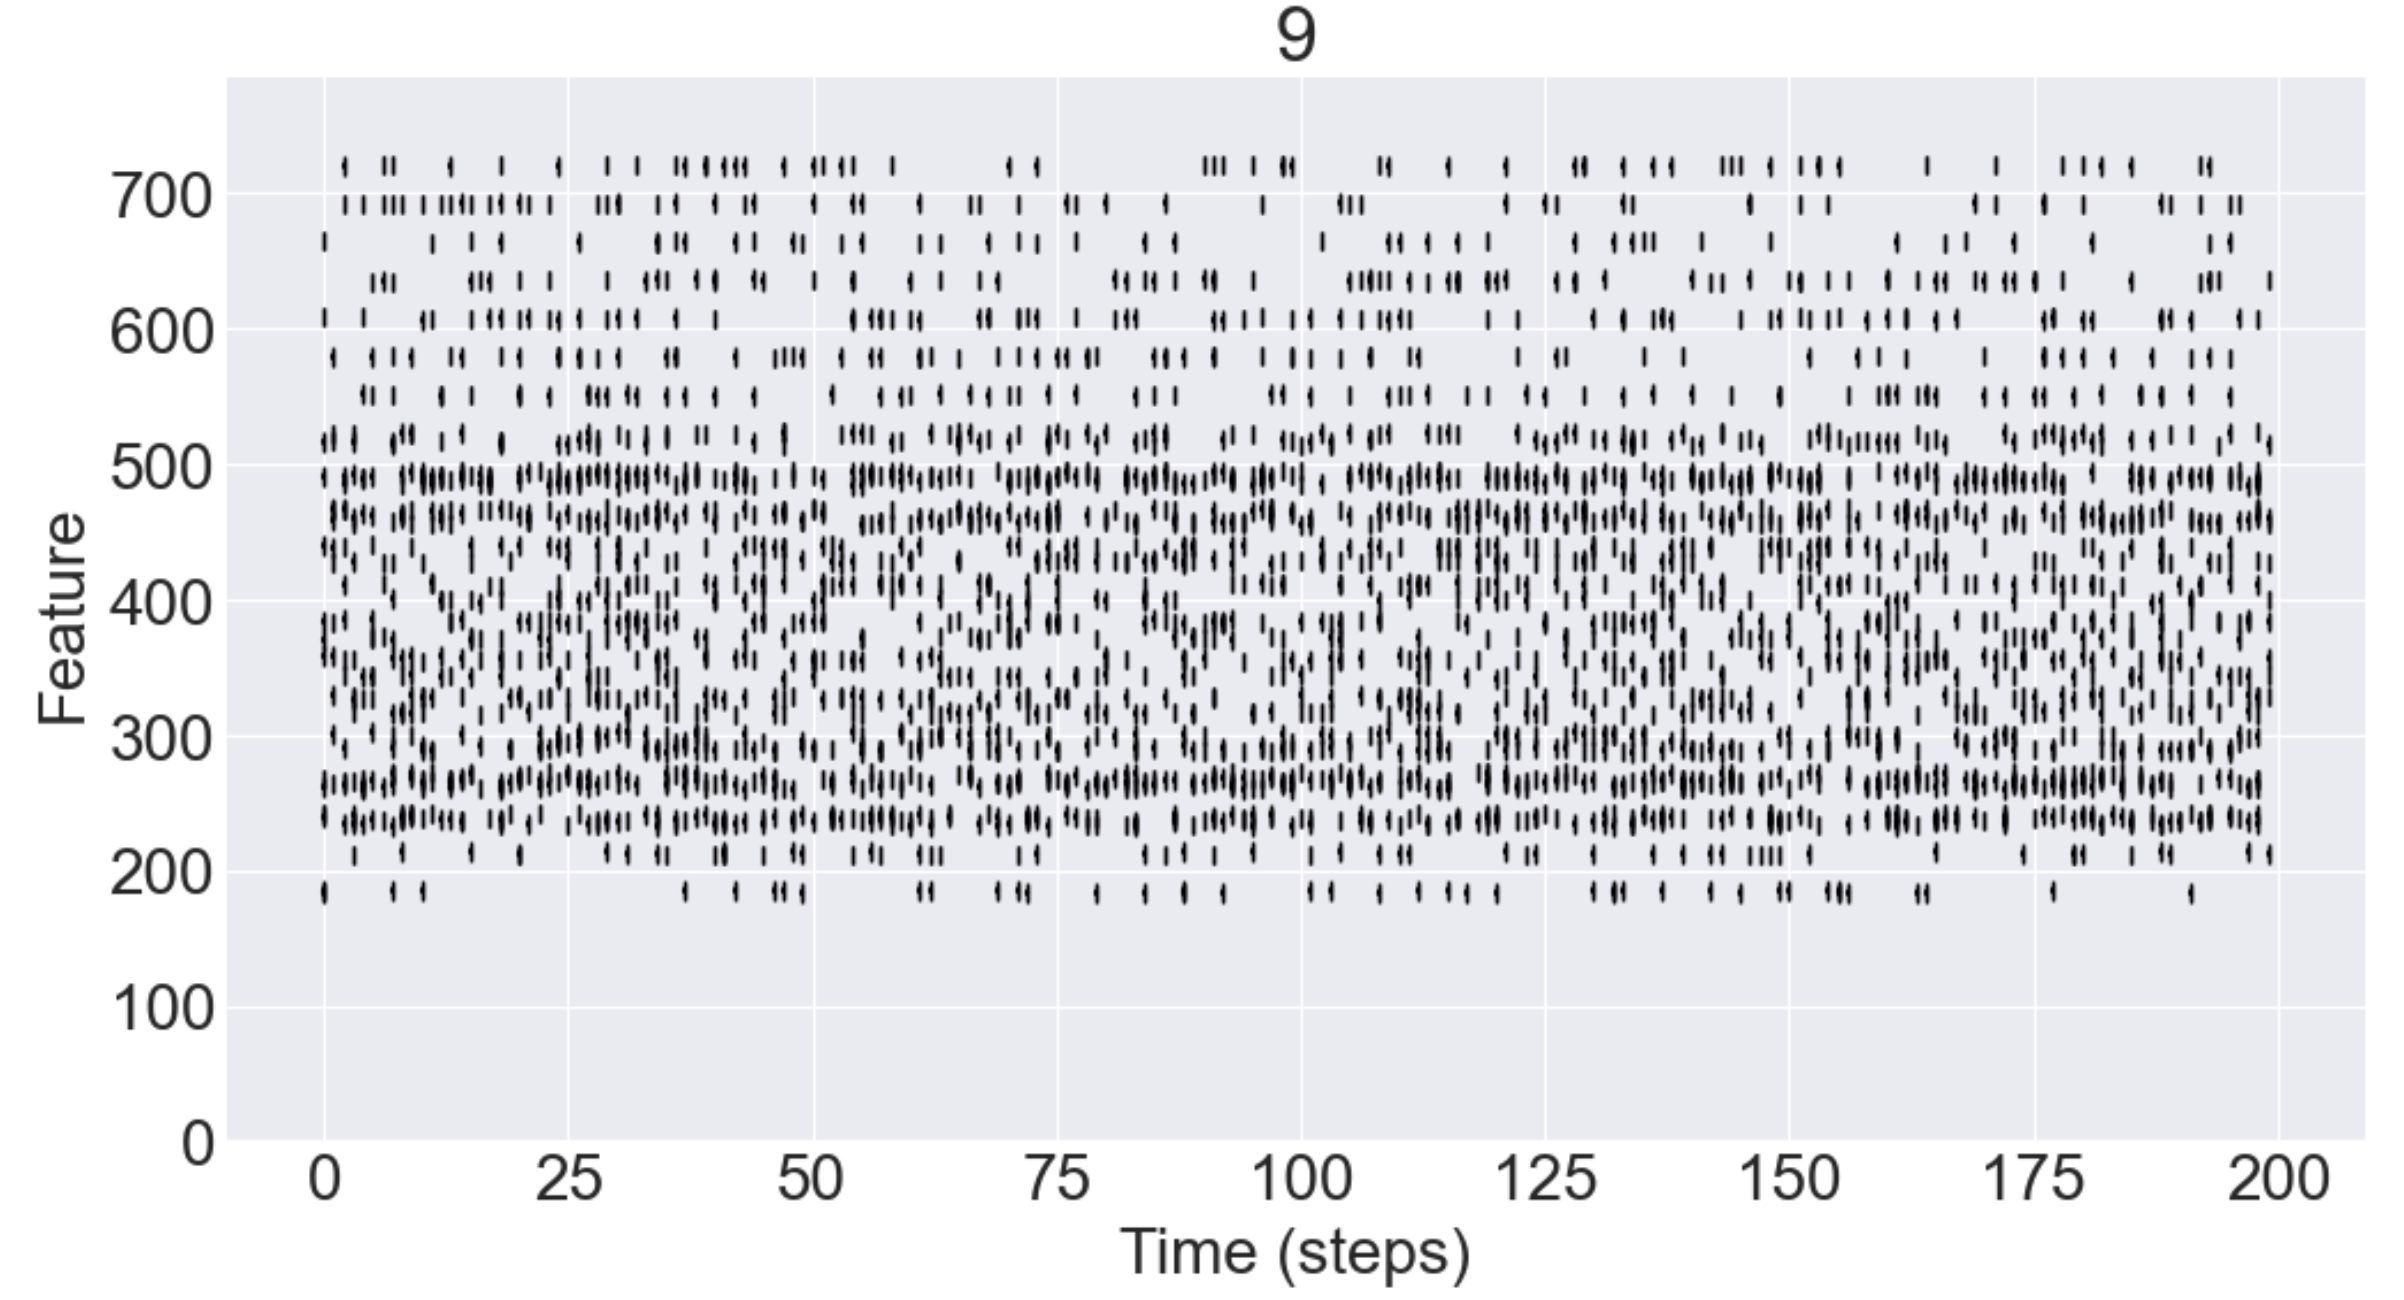

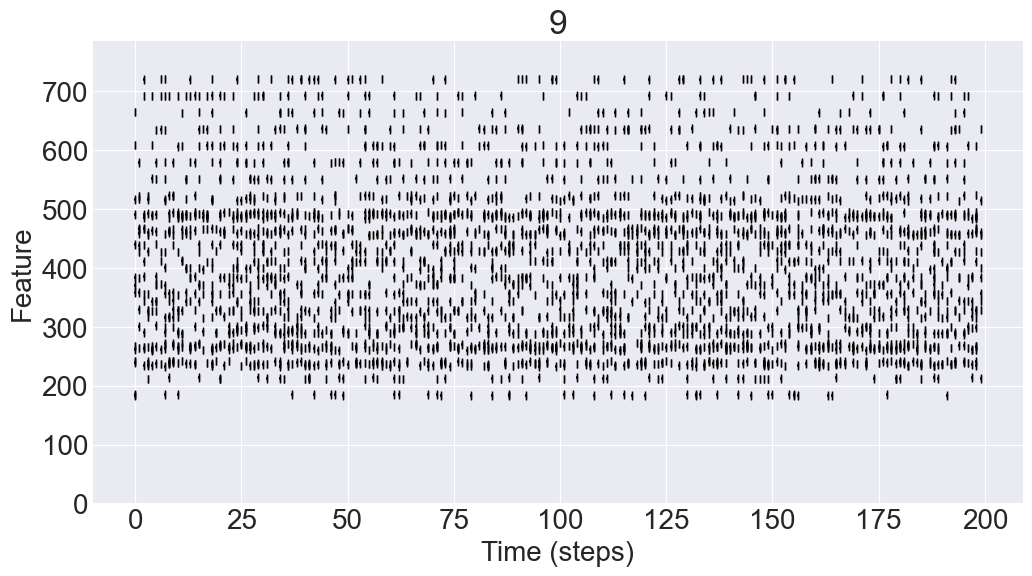

In [15]:
raster_plot(x_enc_train_0[0], y_train[0])

##### (ii) Test: Sample 15, 350 msec

The following test code should produce a plot that has the same format as the example above, except:
- The spikes should be most densely concentrated in the center and the least concentrated on the top.

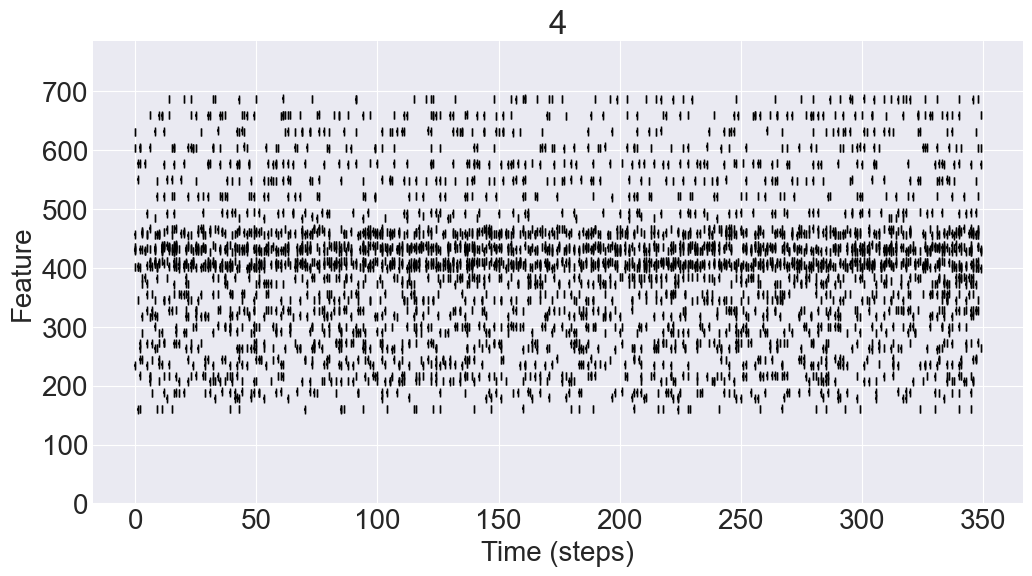

In [16]:
raster_plot(x_enc_train[15], y_train[15])

##### (iii) Test: Sample 15, 350 msec

The following test code should produce a plot that has the same format as the example above, except:
- The concentrated band of spikes should be a bit lower and there should be more "white space".

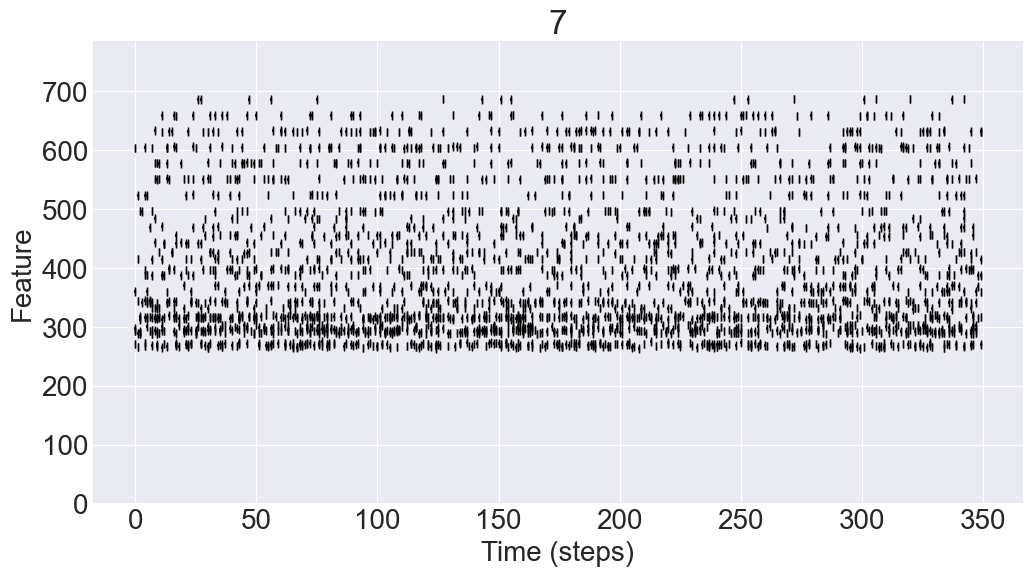

In [17]:
raster_plot(x_enc_train[7], y_train[7])

### L1d. Questions

**Question 1:** In these plots, why are there no ticks/spikes from Feature 0 to ~150 and Feature 700 to 784?

**Question 2:** Why is there a dense thick band of spikes in the middle of the plot for test (ii) and this is absent in the plot from test (iii)?

**Answer 1:**

Because this represents whitespace in the data.  The shown data has whitespace above/below the digits where dark pixels can occur and because we are flattening, this works out to lower and higher features.

**Answer 2:**

There is a dense thick band on the plots because that is where there is more darkspace in a horizontal sense.  For example, a 4 (ii) has a lot of darkspace in the center horizontally beacuse there is where the cross of the 4 is.  Similarly, the 7 has a band on the bottom because that represetns that top part of the image, where it has a dark band.

## L2: Visualize Poisson spike train spatially

### L2a. Encode test samples and write spatial plotting function

Below, convert the first 25 MNIST test samples into 350 msec Poisson spike trains. 

Then, implement the function below and use it to make a 5x5 grid of images showing the first 25 Poisson encoded MNIST samples in the test set summed over the time dimension. Each sample when plotted should look recognizable :)

In [18]:
x_25_poisson = poisson_encode(x_train[:25], t_max=350)

(25, 350, 784)


(25, 28, 28)


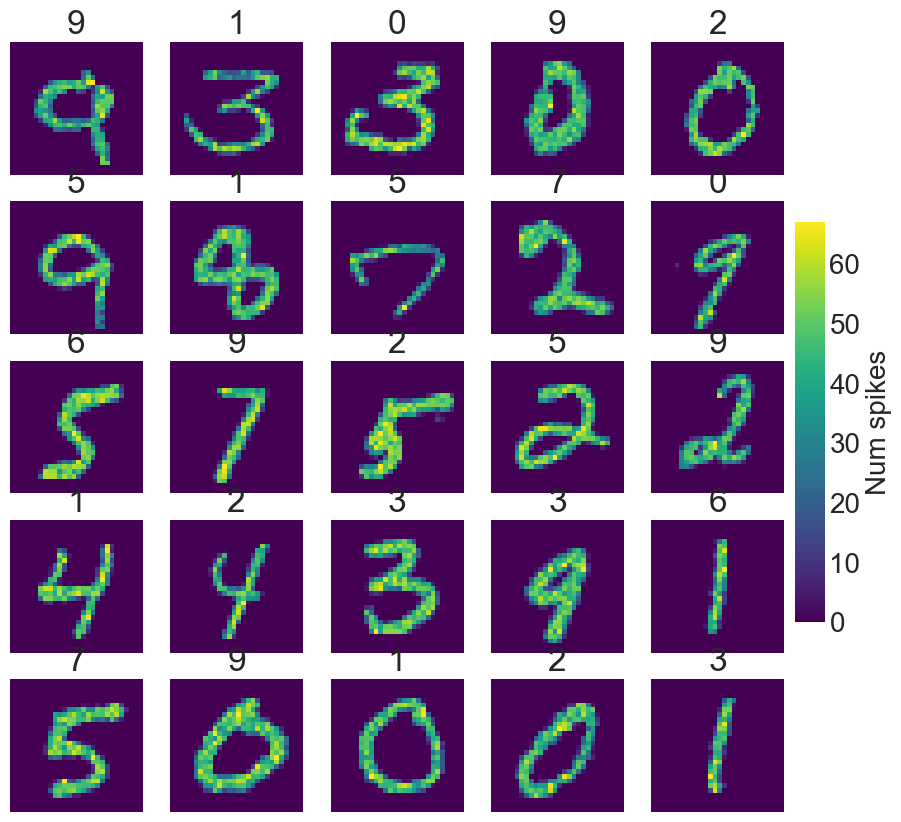

In [20]:
def spatial_spike_plot(x_enc, labels, spatial_dims=(28, 28), n_plt_rc=(5, 5), fig_sz=(10,10)):
    '''Plots the rate coded data samples (spatially) as images.

    Parameters:
    -----------
    x_enc: ndarray. shape=(N, T, M). Poisson rate coded data samples encoded over T time steps.
    labels: ndarray. shape(N,). Class label of each data sample.
    spatial_dims: tuple of int. Original spatial dimensions of each data sample.
    n_plt_rc: tuple of int. Number of samples to plot out of those provided in `x_enc`.
    fig_sz: tuple. Size of the plt figure generated.

    TODO:
    1. Reshape the rate coded data samples so that the spatial dimensions are "unflattened"/restored.
    For example, (784,) features become (28, 28).
    2. Sum across the time/T dimensions and name the output of these steps `samps_reshaped`.
    '''
    # Only take number of samples that fit in plot
    x_enc = x_enc[:n_plt_rc[0]*n_plt_rc[1]]

    x_enc = np.reshape(x_enc, (x_enc.shape[0],x_enc.shape[1],spatial_dims[0],spatial_dims[1]))
    samps_reshaped = np.sum(x_enc,axis = 1)
    print(samps_reshaped.shape)

    fig, axes = plt.subplots(nrows=n_plt_rc[0], ncols=n_plt_rc[1], figsize=fig_sz)
    cbar_ax = fig.add_axes([.91, .3, .03, .4])
    
    for r in range(n_plt_rc[0]):
        for c in range(n_plt_rc[1]):
            ind = r*n_plt_rc[1] + c
            im = axes[r,c].imshow(samps_reshaped[ind], cmap='viridis')
            axes[r,c].set_xticks([])
            axes[r,c].set_yticks([])
            axes[r,c].set_title(labels[ind])
            
            if r == 0 and c == 0:
                cbar = plt.colorbar(im, cax=cbar_ax)
                cbar.set_label('Num spikes')
    plt.show()

    
spatial_spike_plot(x_25_poisson, y_test[:25])

### L2b. Questions

**Question 3:** Why does the interior of the digits look "speckled"?

**Question 4:** Briefly describe what the above grid plot shows.

**Answer 3:**

The digits look speckled because we have summed over the time dimension. Every darkspace cannot spike every timestep, so when they are aggregated, some exist more than others.

**Answer 4:**

Similarly, to the above answer, this shows an image (in the linear algebra sense) the spiking for a given input.  Illuminated pixels are where a spike has/is occurred.

## Turn in your lab on Google Classroom

Create a ZIP file with your notebook and Python file. Only one person per group needs to submit.